# Uber Pickups Analysis - NYC (Apr-Sep 2014)

## Data Loading and Preparation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

%matplotlib inline

In [55]:
# Load datasets using explicit (relative) file paths to their subdirectories if not in root
df_apr14 = pd.read_csv("files/uber-raw-data-apr14.csv")
df_may14 = pd.read_csv("files/uber-raw-data-may14.csv")
df_jun14 = pd.read_csv("files/uber-raw-data-jun14.csv")
df_jul14 = pd.read_csv("files/uber-raw-data-jul14.csv")
df_aug14 = pd.read_csv("files/uber-raw-data-aug14.csv")
df_sep14 = pd.read_csv("files/uber-raw-data-sep14.csv")

In [13]:
# Merge dataframes
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

In [14]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [16]:
# Data transformation
df = df.rename(columns={'Date/Time': 'Date_time'})
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [17]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [19]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,NaN,NaN,NaN,5,6,7,NaN,NaN,NaN
top,NaN,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,1.600000e+01,1.500000e+01,2.900000e+01
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,2.300000e+01,1.900000e+01,4.400000e+01
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,NaN,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


## Exploration and Visualization

### Trips by Hour

In [20]:
# Group by hour
df_hour = df.groupby('Hour').size().to_frame('Number_of_trips')
df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


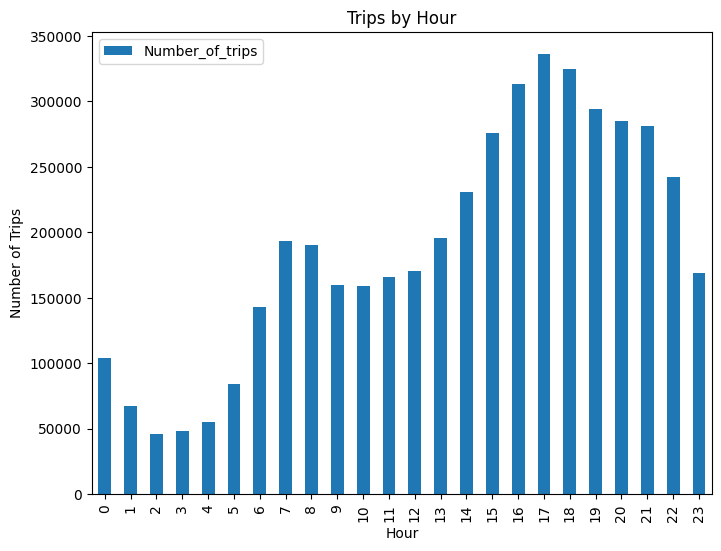

In [21]:
df_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Hour')
plt.show()

In [22]:
max_trips = df_hour['Number_of_trips'].max()
max_hour = df_hour['Number_of_trips'].idxmax()
print(f'Peak hour: {max_hour}:00 with {max_trips:,} trips')

Peak hour: 17:00 with 336,190 trips


**Insight:** Peak activity at 5:00 PM aligns with end of workday, indicating work-related travel dependency.

### Trips by Month

In [23]:
# Group by month
df_month = df.groupby('Month', sort=False).size().to_frame('Number_of_trips')
df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


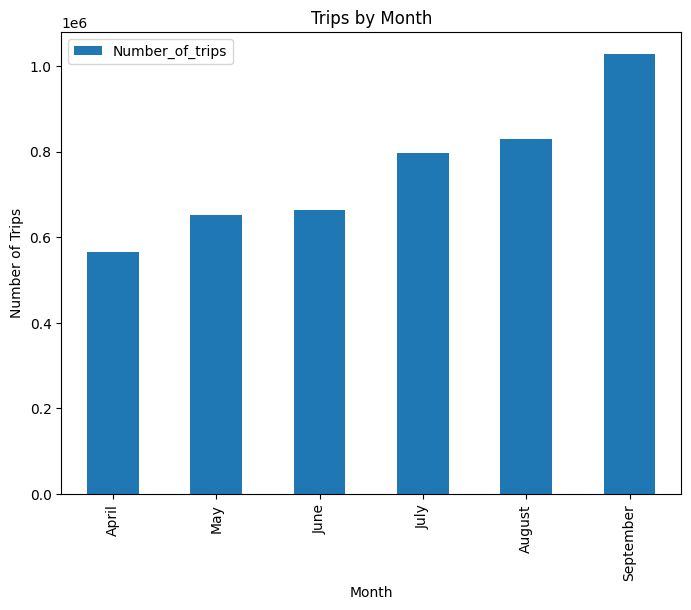

In [24]:
df_month.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Month')
plt.show()

**Insight:** Continuous growth month-over-month with 24% increase from August to September.

In [25]:
ratio_month = ((df_month.loc['September'] - df_month.loc['August']) / df_month.loc['August'] * 100).values[0]
print(f'August to September growth: {ratio_month:.0f}%')

August to September growth: 24%


### Trips by Weekday

In [26]:
# Group by weekday
df_weekday = df.groupby('Weekday', sort=False).size().to_frame('Number_of_trips')
df_weekday

,Number_of_trips
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114
Sunday,490180
Monday,541472


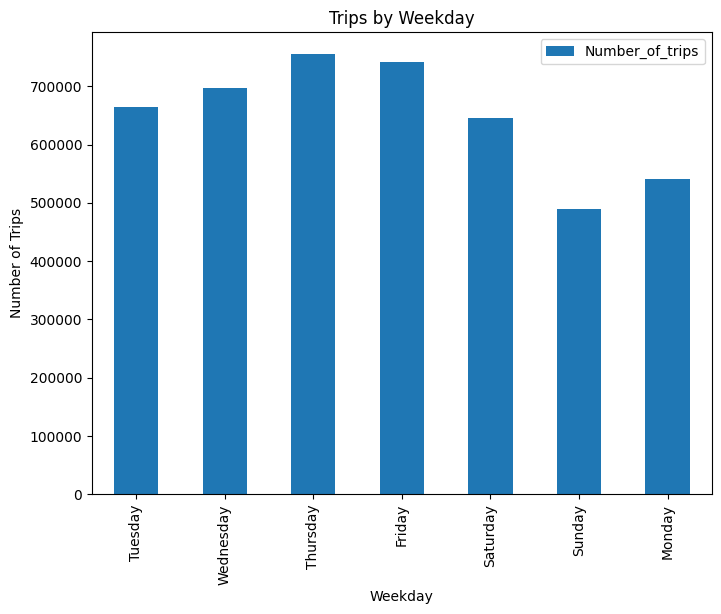

In [27]:
df_weekday.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')
plt.show()

In [28]:
min_trips = df_weekday['Number_of_trips'].min()
min_weekday = df_weekday['Number_of_trips'].idxmin()
print(f'Lowest trips: {min_weekday} with {min_trips:,} trips')

Lowest trips: Sunday with 490,180 trips


In [29]:
mean_weekend = (df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']).values[0] / 2
mean_workday = df_weekday.loc[['Monday','Tuesday','Wednesday','Thursday','Friday']].mean().values[0]
ratio_weekday = ((mean_workday - mean_weekend) / mean_weekend * 100)
print(f'Workdays have {ratio_weekday:.1f}% more trips than weekends on average')

Workdays have 19.6% more trips than weekends on average


**Insight:** Workdays show 19.6% higher trips than weekends. Monday has notably lower trips requiring further investigation.

### Trips by Day

In [30]:
# Group by day
df_day = df.groupby('Day').size().to_frame('Number_of_trips')
df_day.head()


,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


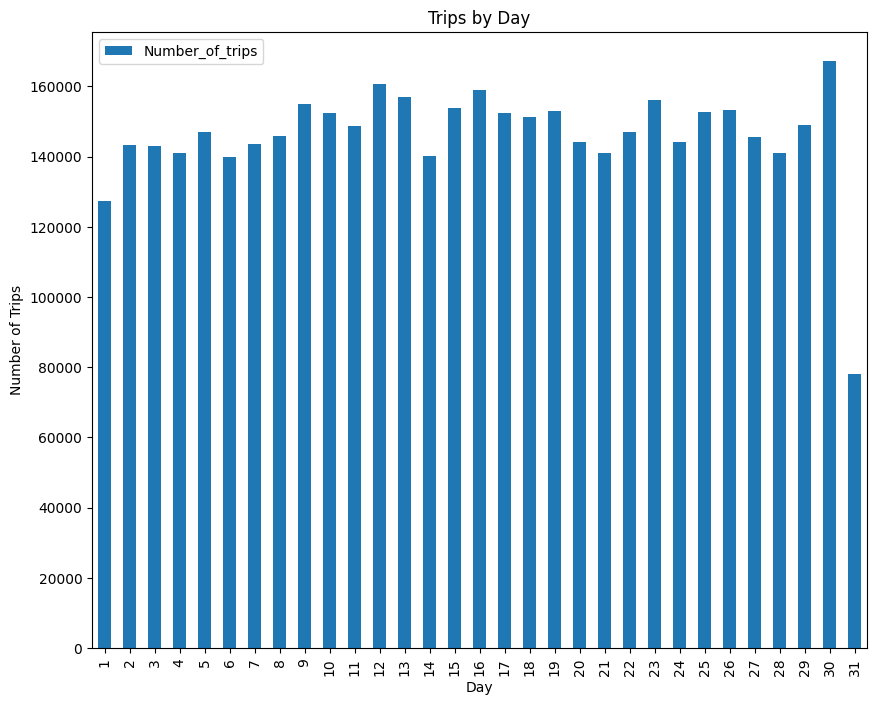

In [31]:
df_day.plot(kind='bar', figsize=(10,8))
plt.ylabel('Number of Trips')
plt.title('Trips by Day')
plt.show()

**Insight:** Day 31 has fewer trips (only 3 months have 31 days). Day 30 shows highest trips with minimal day-to-day variation.

### Trips by Hour and Month

In [32]:
# Group by hour and month
df_hour_month = df.groupby(['Hour','Month']).size().unstack(fill_value=0)
df_hour_month.head(10)

Month,April,August,July,June,May,September
Hour,,,,,,
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675
5,9476,16525,14932,11955,10789,20262
6,18498,24907,23456,22030,21015,33307
7,24924,34064,32545,30834,27413,43314
8,22843,34566,33387,29771,25460,44477


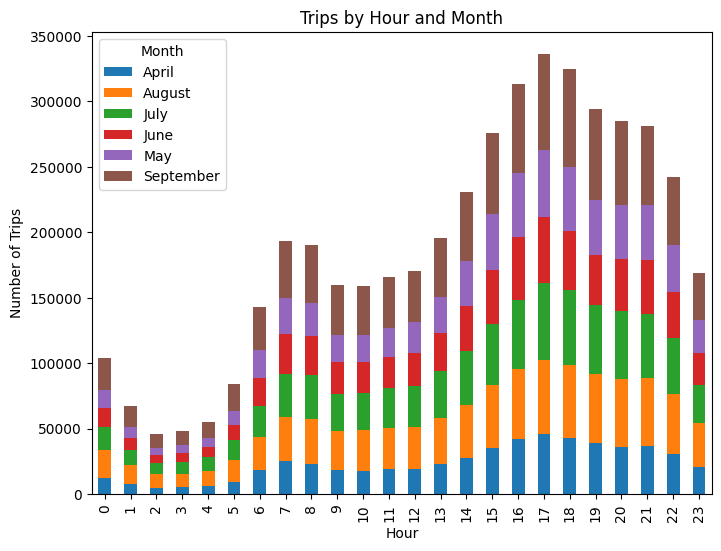

In [33]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')
plt.show()


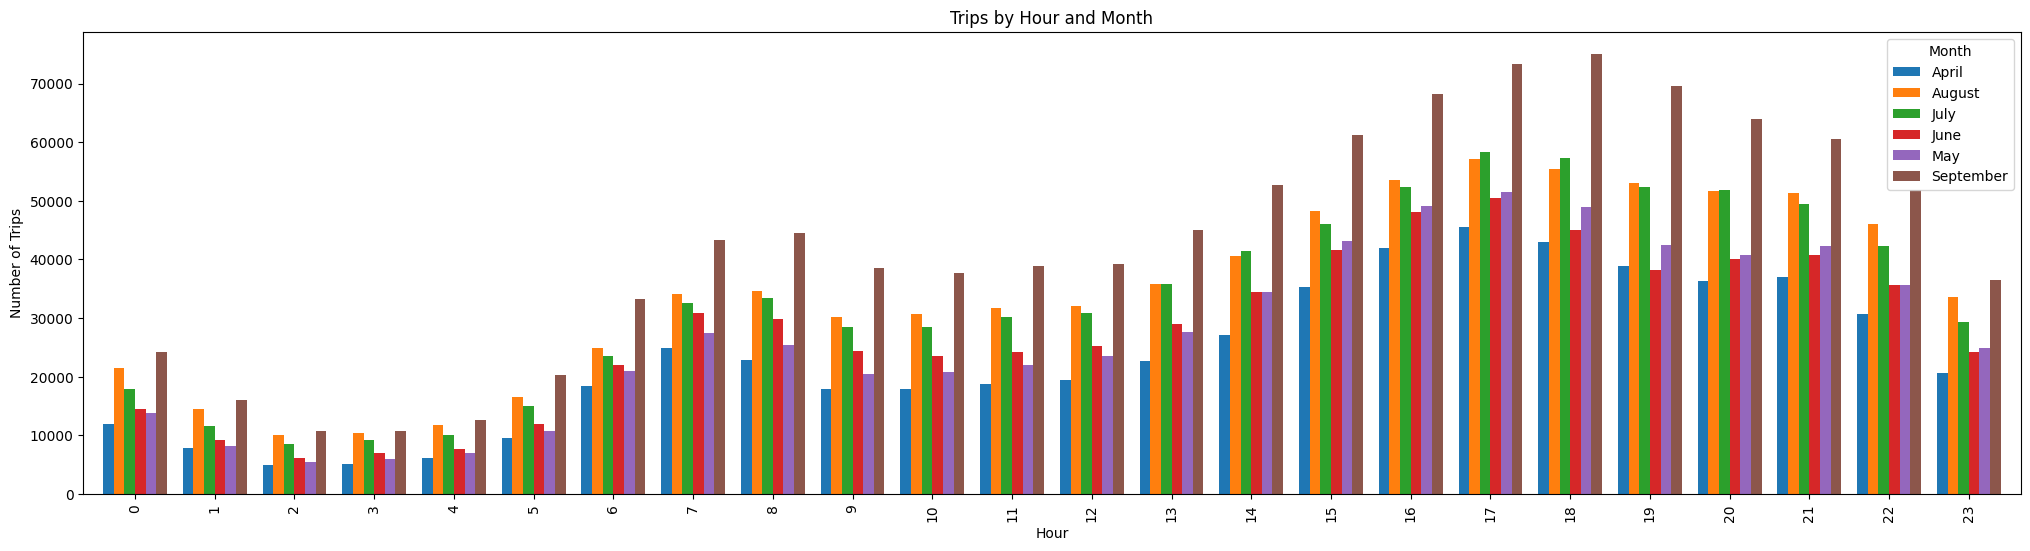

In [34]:
df_hour_month.plot(kind='bar', figsize=(25,6), width=0.8)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')
plt.show()

### Trips by Weekday and Hour

In [35]:
# Group by weekday and hour
df_weekday_hour = df.groupby(['Weekday','Hour'], sort=False).size().unstack(fill_value=0)
df_weekday_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811


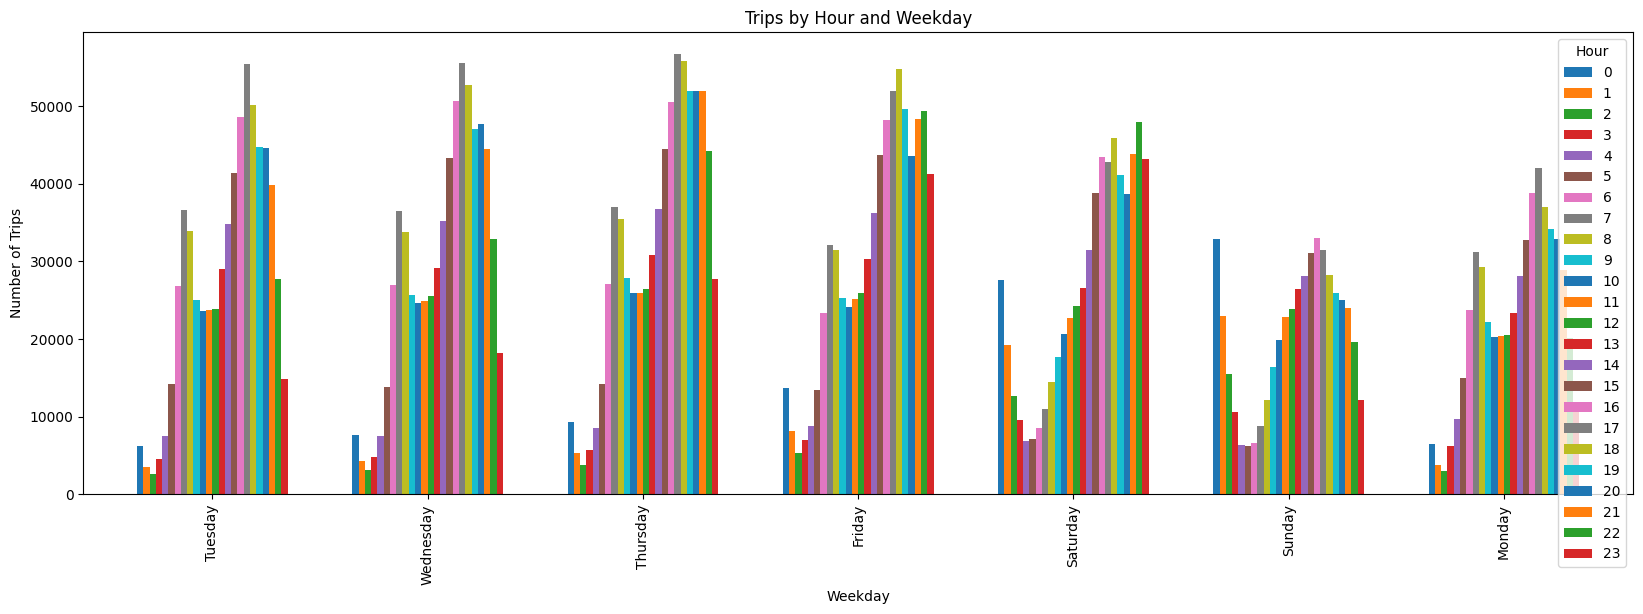

In [36]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width=0.7)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')
plt.show()

**Insight:** Workdays show morning rush (7-8 AM) absent on weekends. Weekends show higher late-night trips (midnight-2 AM).

### Trips by Weekday and Month

In [37]:
# Group by month and weekday
df_month_weekday = df.groupby(['Month','Weekday'], sort=False).size().unstack(fill_value=0)
df_month_weekday.head(10)

Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Month,,,,,,,
April,91185,108631,85067,90303,77218,51251,60861
May,76662,89857,128921,133991,102990,56168,63846
June,88134,99654,115325,105056,81364,79656,94655
July,137454,147717,148439,102735,90260,76327,93189
August,107124,115256,124117,148674,132225,110246,91633
September,163230,135373,153276,160380,162057,116532,137288


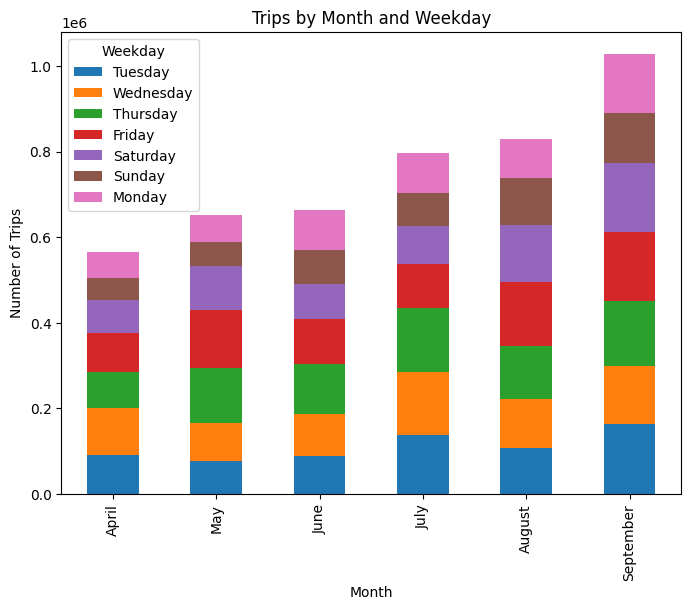

In [38]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')
plt.show()

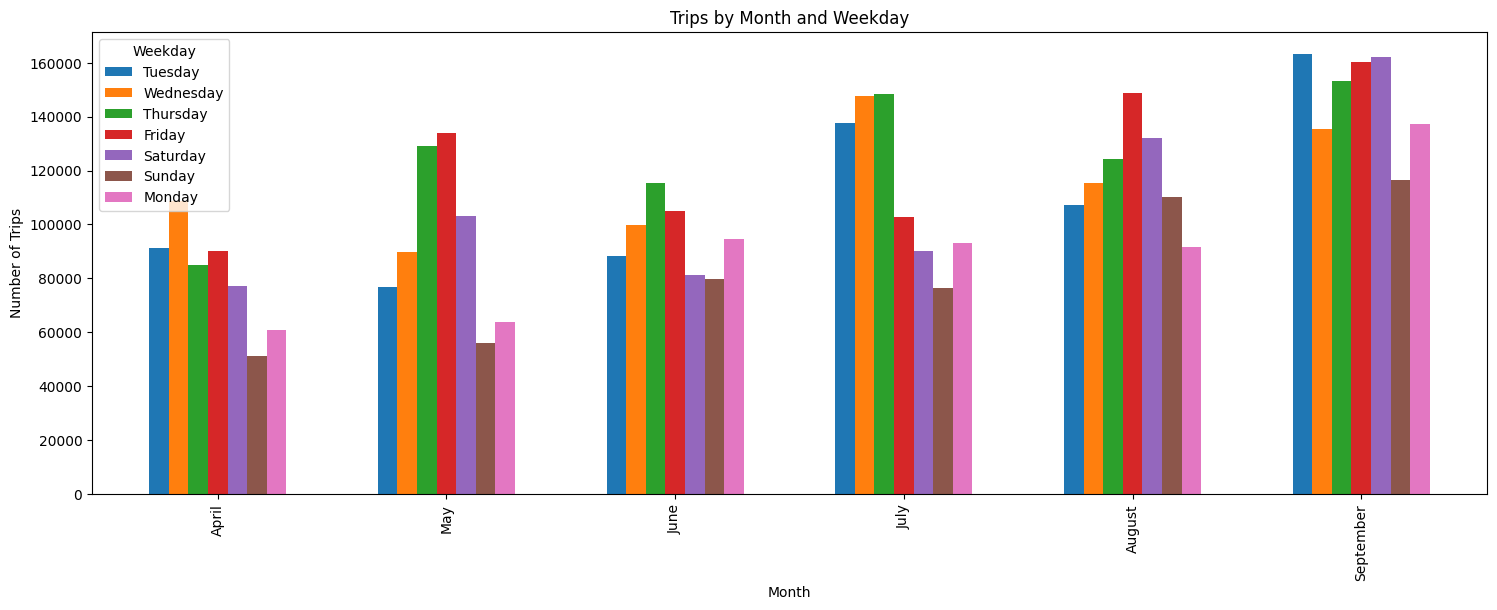

In [39]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width=0.6)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')
plt.show()

## Heatmap Analysis

In [40]:
# Helper function for counting rows
def count_rows(rows):
    return len(rows)

### Heatmap: Hour and Day

In [42]:
# Create hour and day heatmap data
df_hour_day = df.groupby(['Hour', 'Day'], sort=False).apply(count_rows).unstack()
df_hour_day.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17296\2735994896.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_hour_day = df.groupby(['Hour', 'Day'], sort=False).apply(count_rows).unstack()


Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788


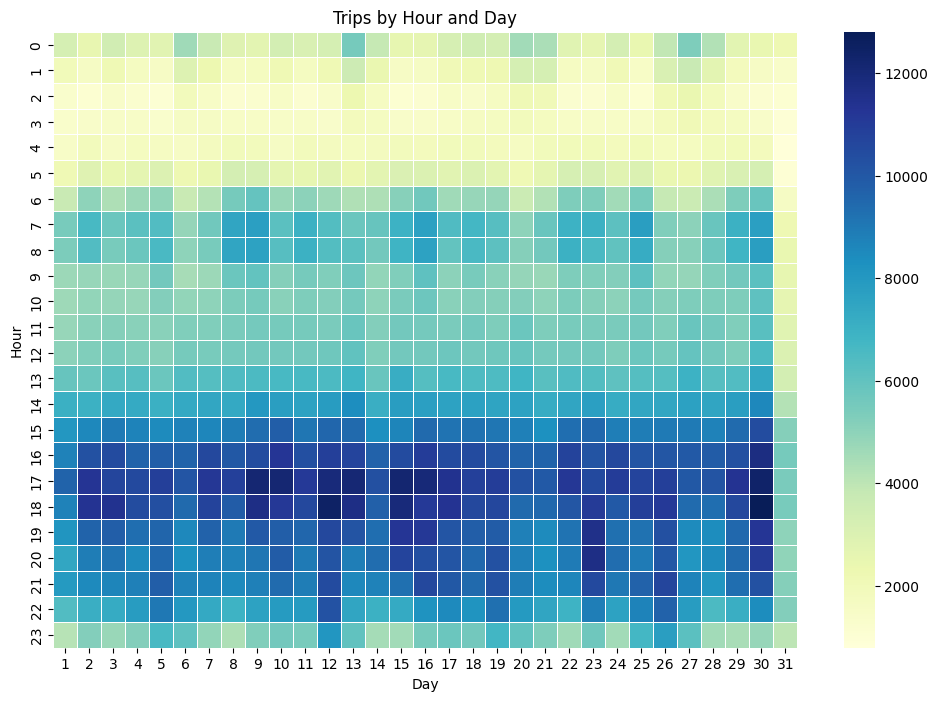

In [43]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_hour_day, cmap=cm.YlGnBu, linewidth=0.5)
ax.set(title="Trips by Hour and Day")
plt.show()

**Insight:** Peak demand 16:00-18:00 (evening commute). Trips increase throughout the day.

### Heatmap: Hour and Weekday

In [46]:
df_hour_weekday = df.groupby(['Hour', 'Weekday'], sort=False).apply(count_rows).unstack()
df_hour_weekday.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17296\806436944.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_hour_weekday = df.groupby(['Hour', 'Weekday'], sort=False).apply(count_rows).unstack()


Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Hour,,,,,,,
0,6237,7644,9293,13716,27633,32877,6436
1,3509,4324,5290,8163,19189,23015,3737
2,2571,3141,3719,5350,12710,15436,2938
3,4494,4855,5637,6930,9542,10597,6232
4,7548,7511,8505,8806,6846,6374,9640


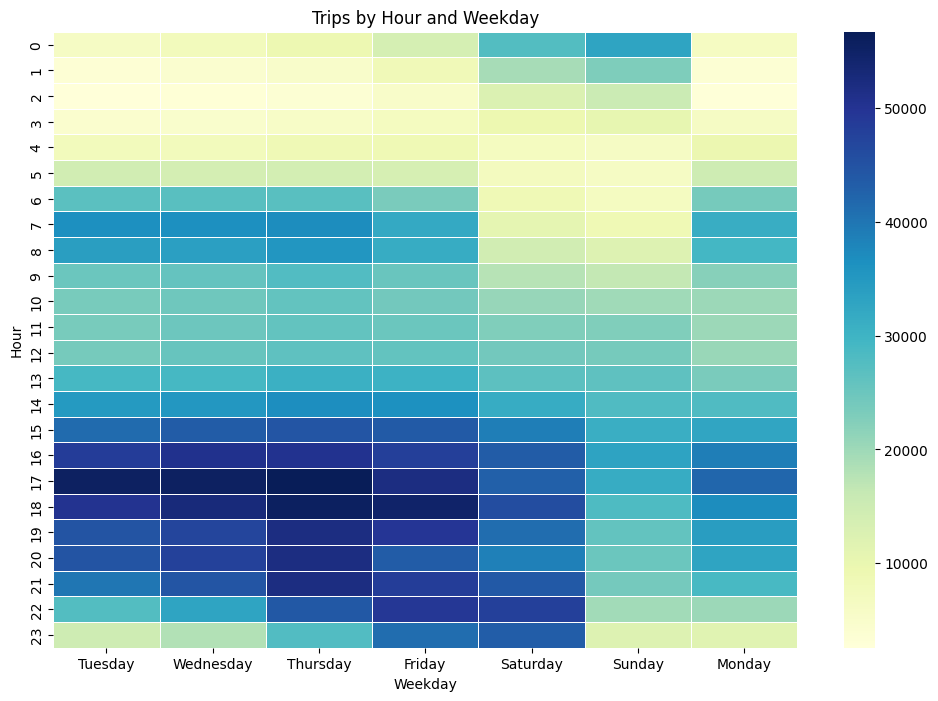

In [47]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_hour_weekday, cmap=cm.YlGnBu, linewidth=0.5)
ax.set(title="Trips by Hour and Weekday")
plt.show()

**Insight:** Workdays show high trips 16:00-21:00. Friday extends to 23:00 and early Saturday (weekend start). Saturday shows similar late-night pattern extending to early Sunday.

### Heatmap: Day and Month

In [49]:
df_day_month = df.groupby(['Day', 'Month'], sort=False).apply(count_rows).unstack()
df_day_month.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17296\3339605972.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_day_month = df.groupby(['Day', 'Month'], sort=False).apply(count_rows).unstack()


Month,April,May,June,July,August,September
Day,,,,,,
1,14546.0,23375.0,15967.0,21228.0,32353.0,19961.0
2,17474.0,24235.0,17503.0,26480.0,28678.0,28831.0
3,20701.0,22234.0,22674.0,21597.0,23146.0,32631.0
4,26714.0,13918.0,22831.0,14148.0,24952.0,38360.0
5,19521.0,17859.0,28371.0,10890.0,28094.0,42319.0


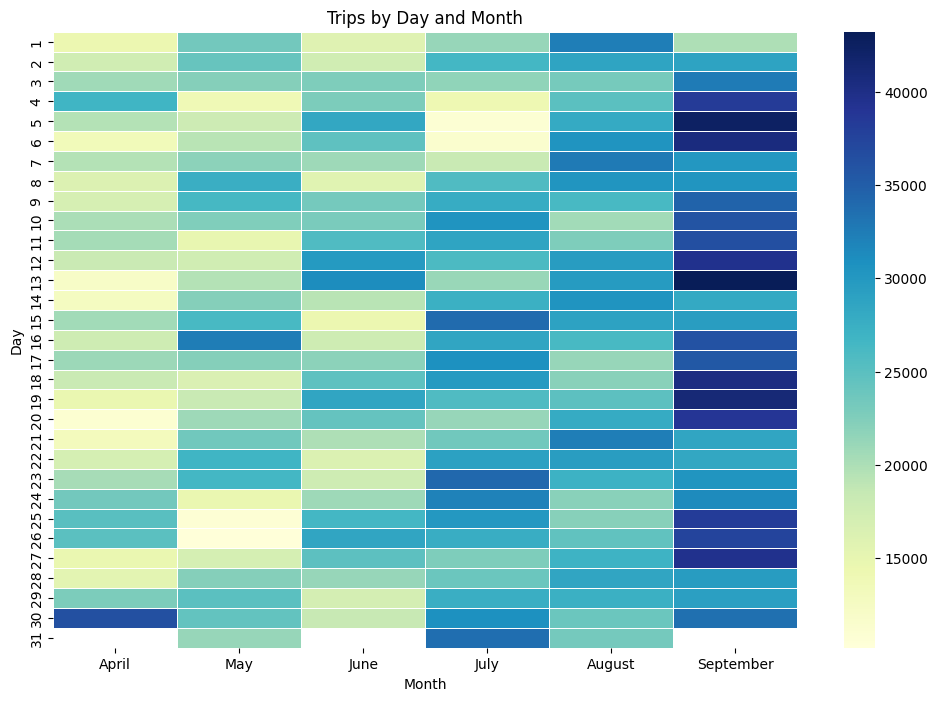

In [50]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_day_month, cmap=cm.YlGnBu, linewidth=0.5)
ax.set(title="Trips by Day and Month")
plt.show()

**Insight:** Continuous monthly growth observed. April 30 shows outlier spike (2x average) - potential marketing event or data anomaly.

In [51]:
max_april = df_day_month['April'].max()
mean_rest_april = df_day_month['April'][:29].mean()
ratio_april = round(max_april / mean_rest_april)
print(f'April 30 trips: {ratio_april}x higher than monthly average')

April 30 trips: 2x higher than monthly average


### Heatmap: Month and Weekday

In [53]:
df_month_weekday = df.groupby(['Month', 'Weekday'], sort=False).apply(count_rows).unstack()
df_month_weekday.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17296\1225792862.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_month_weekday = df.groupby(['Month', 'Weekday'], sort=False).apply(count_rows).unstack()


Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Month,,,,,,,
April,91185,108631,85067,90303,77218,51251,60861
May,76662,89857,128921,133991,102990,56168,63846
June,88134,99654,115325,105056,81364,79656,94655
July,137454,147717,148439,102735,90260,76327,93189
August,107124,115256,124117,148674,132225,110246,91633


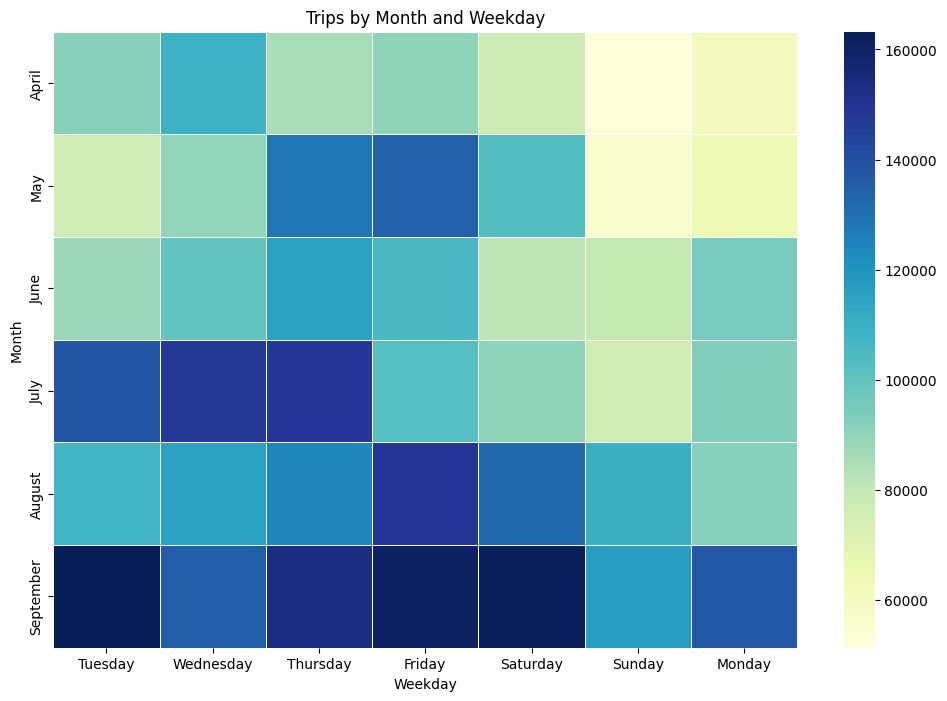

In [54]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_month_weekday, cmap=cm.YlGnBu, linewidth=0.5)
ax.set(title="Trips by Month and Weekday")
plt.show()

## Conclusion

**Key Findings:**
- Peak demand: 17:00 (5 PM)
- Primary users: Workers (commute patterns evident)
- Growth: Continuous improvement April-September 2014
- Workday patterns: Morning rush 7-8 AM, evening peak 16-18 PM
- Weekend patterns: Higher late-night usage (midnight-2 AM)
- Anomaly: Monday shows lower trips than other workdays (requires investigation)






